Missing Values:
CustomerID      0
CustomerName    0
Region          0
SignupDate      0
dtype: int64
ProductID      0
ProductName    0
Category       0
Price          0
dtype: int64
TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price              0
dtype: int64

Duplicate Entries:
0
0
0

Summary Statistics:
                     TransactionDate     Quantity   TotalValue     Price_x  \
count                           1000  1000.000000  1000.000000  1000.00000   
mean   2024-06-23 15:33:02.768999936     2.537000   689.995560   272.55407   
min              2023-12-30 15:29:12     1.000000    16.080000    16.08000   
25%       2024-03-25 22:05:34.500000     2.000000   295.295000   147.95000   
50%       2024-06-26 17:21:52.500000     3.000000   588.880000   299.93000   
75%              2024-09-19 14:19:57     4.000000  1011.660000   404.40000   
max              2024-12-28 11:00:00     4.000000  1991.040000   

<ipython-input-2-5008386c9a2b>:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=customers, x='Region', order=region_counts.index, palette='pastel')


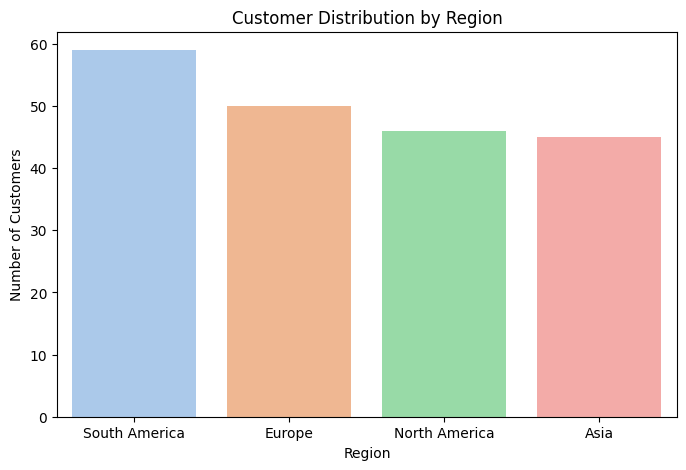

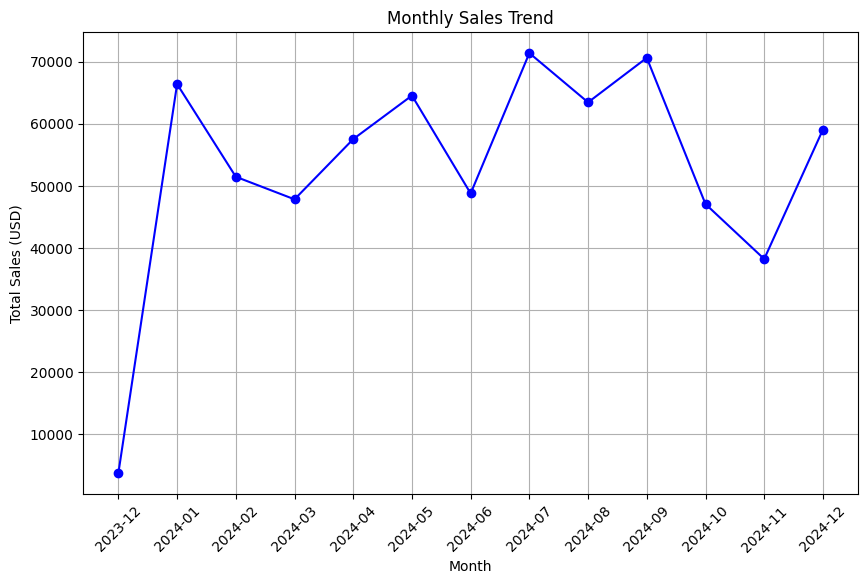

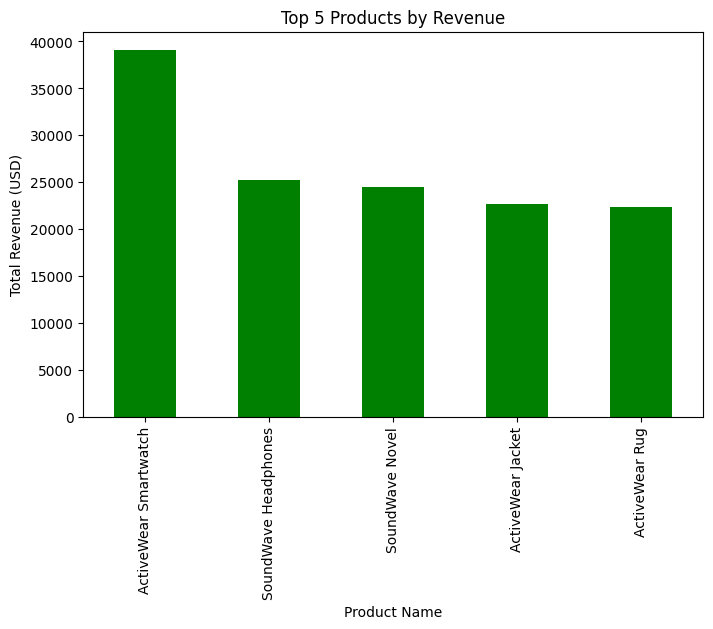

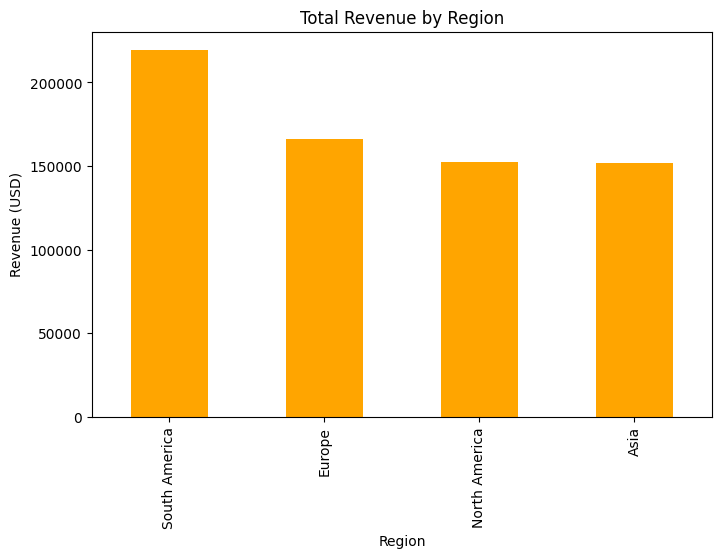

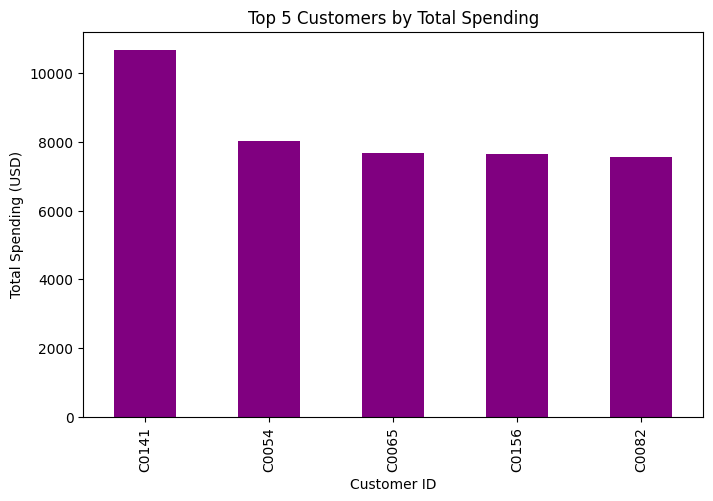

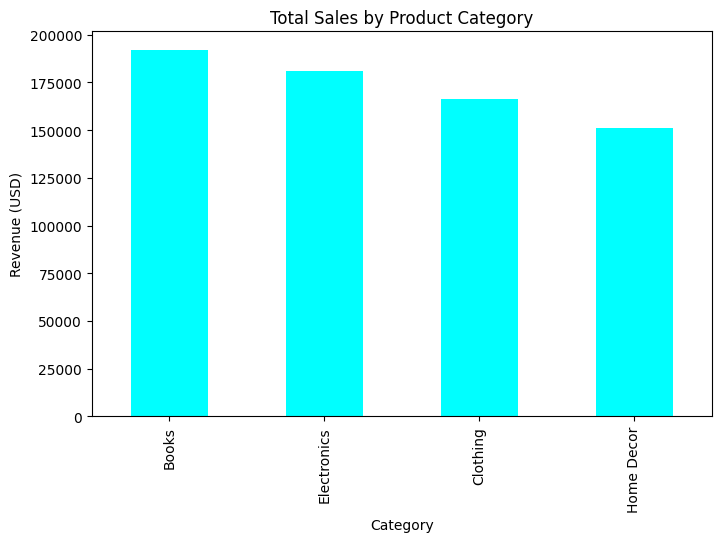

In [2]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
customers = pd.read_csv('Customers.csv')
products = pd.read_csv('Products.csv')
transactions = pd.read_csv('Transactions.csv')

# Convert date columns to datetime for easier analysis
customers['SignupDate'] = pd.to_datetime(customers['SignupDate'])
transactions['TransactionDate'] = pd.to_datetime(transactions['TransactionDate'])

# Basic EDA: Check for missing values and duplicates
print("Missing Values:")
print(customers.isnull().sum(), products.isnull().sum(), transactions.isnull().sum(), sep='\n')
print("\nDuplicate Entries:")
print(customers.duplicated().sum(), products.duplicated().sum(), transactions.duplicated().sum(), sep='\n')

# Drop duplicates if any
customers.drop_duplicates(inplace=True)
products.drop_duplicates(inplace=True)
transactions.drop_duplicates(inplace=True)

# Merge datasets for comprehensive analysis
merged_df = pd.merge(transactions, customers, on='CustomerID', how='left')
merged_df = pd.merge(merged_df, products, on='ProductID', how='left')

# Summary statistics for numerical data
print("\nSummary Statistics:")
print(merged_df.describe())

# Extract additional time-based features
merged_df['Month'] = merged_df['TransactionDate'].dt.to_period('M')
merged_df['Year'] = merged_df['TransactionDate'].dt.year

# Insights 1: Customer Distribution by Region
region_counts = customers['Region'].value_counts()
plt.figure(figsize=(8, 5))
sns.countplot(data=customers, x='Region', order=region_counts.index, palette='pastel')
plt.title('Customer Distribution by Region')
plt.xlabel('Region')
plt.ylabel('Number of Customers')
plt.show()

# Insights 2: Monthly Sales Trends
monthly_sales = merged_df.groupby('Month')['TotalValue'].sum().reset_index()
plt.figure(figsize=(10, 6))
plt.plot(monthly_sales['Month'].astype(str), monthly_sales['TotalValue'], marker='o', color='b')
plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Total Sales (USD)')
plt.xticks(rotation=45)
plt.grid()
plt.show()

# Insights 3: Top Products by Revenue
product_revenue = merged_df.groupby('ProductName')['TotalValue'].sum().sort_values(ascending=False).head(5)
plt.figure(figsize=(8, 5))
product_revenue.plot(kind='bar', color='green')
plt.title('Top 5 Products by Revenue')
plt.xlabel('Product Name')
plt.ylabel('Total Revenue (USD)')
plt.show()

# Insights 4: Revenue by Region
region_revenue = merged_df.groupby('Region')['TotalValue'].sum().sort_values(ascending=False)
plt.figure(figsize=(8, 5))
region_revenue.plot(kind='bar', color='orange')
plt.title('Total Revenue by Region')
plt.xlabel('Region')
plt.ylabel('Revenue (USD)')
plt.show()

# Insights 5: Top Customers by Transaction Value
customer_revenue = merged_df.groupby('CustomerID')['TotalValue'].sum().sort_values(ascending=False).head(5)
plt.figure(figsize=(8, 5))
customer_revenue.plot(kind='bar', color='purple')
plt.title('Top 5 Customers by Total Spending')
plt.xlabel('Customer ID')
plt.ylabel('Total Spending (USD)')
plt.show()

# Insights 6: Category-wise Sales
category_sales = merged_df.groupby('Category')['TotalValue'].sum().sort_values(ascending=False)
plt.figure(figsize=(8, 5))
category_sales.plot(kind='bar', color='cyan')
plt.title('Total Sales by Product Category')
plt.xlabel('Category')
plt.ylabel('Revenue (USD)')
plt.show()

